In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

In [101]:
os.chdir(r'../Data')

In [102]:
conn=sqlite3.connect('./database.sqlite')

In [103]:
print(pd.read_sql_query('select * from artists',conn).head())
# print(pd.read_sql_query('select * from artists',conn).columns.values)
print(pd.read_sql_query('select * from artists',conn).columns)

   reviewid          artist
0     22703  massive attack
1     22721        krallice
2     22659    uranium club
3     22661         kleenex
4     22661         liliput
Index(['reviewid', 'artist'], dtype='object')


In [104]:
print(pd.read_sql_query('select * from content',conn).head())

   reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...


In [105]:
pd.read_sql_query('select * from genres',conn).head()

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


In [106]:
pd.read_sql_query('select * from labels',conn).head()

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock
3,22659,fashionable idiots
4,22661,kill rock stars


In [107]:
reviews=pd.read_sql_query('select * from reviews',conn)
reviews.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [108]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18393 non-null  int64  
 1   title           18393 non-null  object 
 2   artist          18393 non-null  object 
 3   url             18393 non-null  object 
 4   score           18393 non-null  float64
 5   best_new_music  18393 non-null  int64  
 6   author          18393 non-null  object 
 7   author_type     14487 non-null  object 
 8   pub_date        18393 non-null  object 
 9   pub_weekday     18393 non-null  int64  
 10  pub_day         18393 non-null  int64  
 11  pub_month       18393 non-null  int64  
 12  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


In [109]:
reviews['best_new_music'].value_counts()

0    17450
1      943
Name: best_new_music, dtype: int64

In [110]:
pd.read_sql_query('select * from years',conn).head()

,reviewid,year
0,22703,1998.0
1,22721,2016.0
2,22659,2016.0
3,22661,2016.0
4,22725,2016.0


In [111]:
df=pd.read_sql_query("select r.reviewid,r.title,r.score,r.best_new_music,a.artist,r.author,r.author_type,r.pub_month,r.pub_year,g.genre,l.label from reviews r left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid join artists a on r.reviewid=a.reviewid",conn)
df.head()

,reviewid,title,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
0,22703,mezzanine,9.3,0,massive attack,nate patrin,contributor,1,2017,electronic,virgin
1,22721,prelapsarian,7.9,0,krallice,zoe camp,contributor,1,2017,metal,hathenter
2,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,fashionable idiots
3,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,static shock
4,22661,first songs,9.0,1,kleenex,jenn pelly,associate reviews editor,1,2017,rock,kill rock stars


In [112]:
conn.close()

In [113]:
#df=pd.read_sql_query("select r.reviewid,r.title,r.artist,r.url,r.score,r.best_new_music,r.author,r.author_type,r.pub_date,r.pub_weekday,r.pub_day,r.pub_month,r.pub_year,y.year from reviews r left join years y on r.reviewid=y.reviewid left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid left join content c on r.reviewid=c.reviewid",conn)
#df.head()

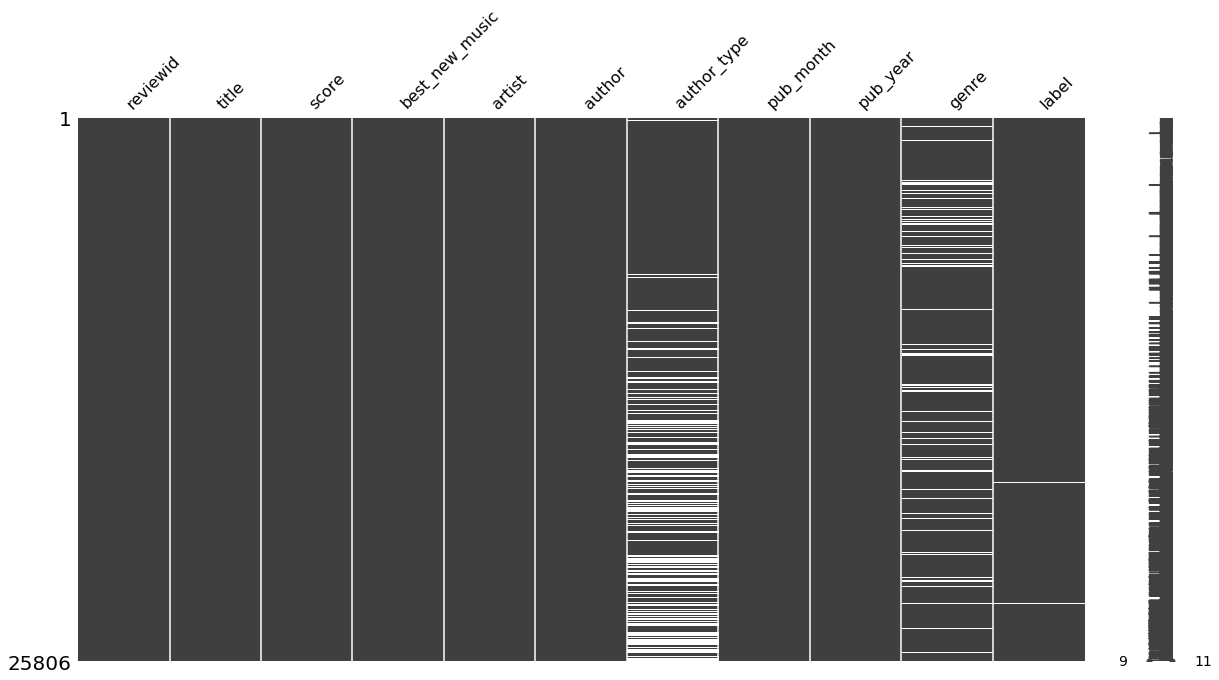

In [114]:
import missingno
missingno.matrix(df,figsize=(20,10))

In [115]:
df.isnull().sum()

reviewid             0
title                0
score                0
best_new_music       0
artist               0
author               0
author_type       5630
pub_month            0
pub_year             0
genre             2591
label               44
dtype: int64

In [116]:
df.head()

,reviewid,title,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
0,22703,mezzanine,9.3,0,massive attack,nate patrin,contributor,1,2017,electronic,virgin
1,22721,prelapsarian,7.9,0,krallice,zoe camp,contributor,1,2017,metal,hathenter
2,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,fashionable idiots
3,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,static shock
4,22661,first songs,9.0,1,kleenex,jenn pelly,associate reviews editor,1,2017,rock,kill rock stars


# Features

## Artists

In [117]:
df['artist'].value_counts()

various artists           785
xiu xiu                    42
prince                     40
animal collective          36
deerhoof                   36
                         ... 
mellowhigh                  1
gag                         1
lydia loveless              1
the embassy                 1
horsepower productions      1
Name: artist, Length: 8633, dtype: int64

## Score

In [118]:
df['score']

0        9.3
1        7.9
2        7.3
3        7.3
4        9.0
        ... 
25801    6.3
25802    7.2
25803    7.2
25804    7.2
25805    6.5
Name: score, Length: 25806, dtype: float64

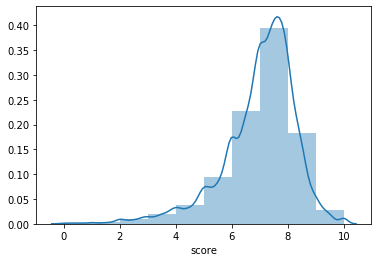

In [119]:
sns.distplot(df['score'],bins=10)

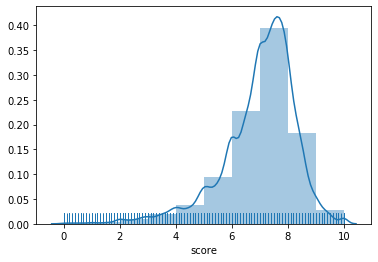

In [120]:
sns.distplot(a=df.score,bins=10,hist=True,kde=True,rug=True);


In [146]:
df['score'].value_counts(bins=10)

(7.0, 8.0]       10092
(6.0, 7.0]        6472
(8.0, 9.0]        3753
(5.0, 6.0]        2817
(4.0, 5.0]        1147
(3.0, 4.0]         566
(9.0, 10.0]        518
(2.0, 3.0]         260
(1.0, 2.0]         105
(-0.011, 1.0]       52
Name: score, dtype: int64

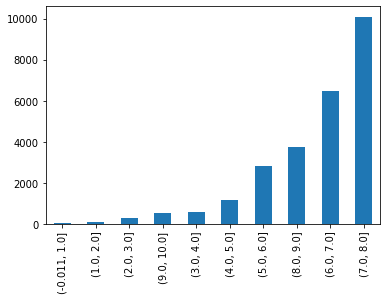

In [148]:
df['score'].value_counts(bins=10,ascending=True).plot(kind='bar',)

## Best New Music

In [149]:
df['best_new_music'].value_counts()

0    24415
1     1367
Name: best_new_music, dtype: int64

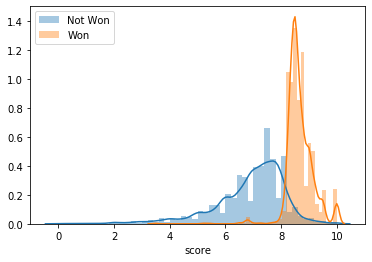

In [150]:
sns.distplot(df[df['best_new_music']==0]['score'])
sns.distplot(df[df['best_new_music']==1]['score'])
plt.legend(labels=['Not Won','Won'])
plt.show()

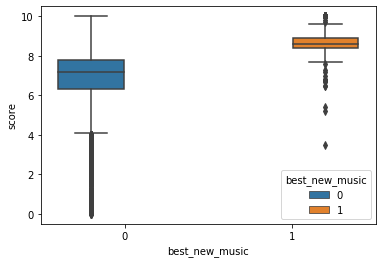

In [151]:
plt.figure()
sns.boxplot(y='score',x='best_new_music',hue='best_new_music',data=df)

In [154]:
df[(df['score']<4)&(df['best_new_music']==1)]

,reviewid,title,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
9832,14817,death to false metal,3.5,1,weezer,ian cohen,contributor,11,2010,rock,geffen


In [155]:
df.drop([9832],axis=0,inplace=True)

## Author

In [156]:
df['author'].value_counts(dropna=False)

joe tangari           1118
ian cohen              963
stephen m. deusner     866
mark richardson        716
brian howe             706
                      ... 
kevin lozano             1
philip sherburne         1
drew gaerig              1
martin clark             1
seth colter-walls        1
Name: author, Length: 432, dtype: int64

In [157]:
df[df['score']>7]['author'].value_counts()

joe tangari           811
mark richardson       501
stephen m. deusner    476
brian howe            413
marc masters          374
                     ... 
judy berman             1
jt ramsay               1
max mertens             1
yancey strickler        1
jeff leven              1
Name: author, Length: 388, dtype: int64

## Author Type

In [158]:
df['author_type'].value_counts(dropna=False)

contributor                  22856
senior editor                  734
executive editor               714
senior staff writer            632
contributing editor            241
editor-in-chief                134
deputy news editor             131
associate staff writer         128
tracks coordinator              58
associate reviews editor        55
associate editor                54
assistant editor                19
associate features editor       17
news director                    5
managing editor                  3
Name: author_type, dtype: int64

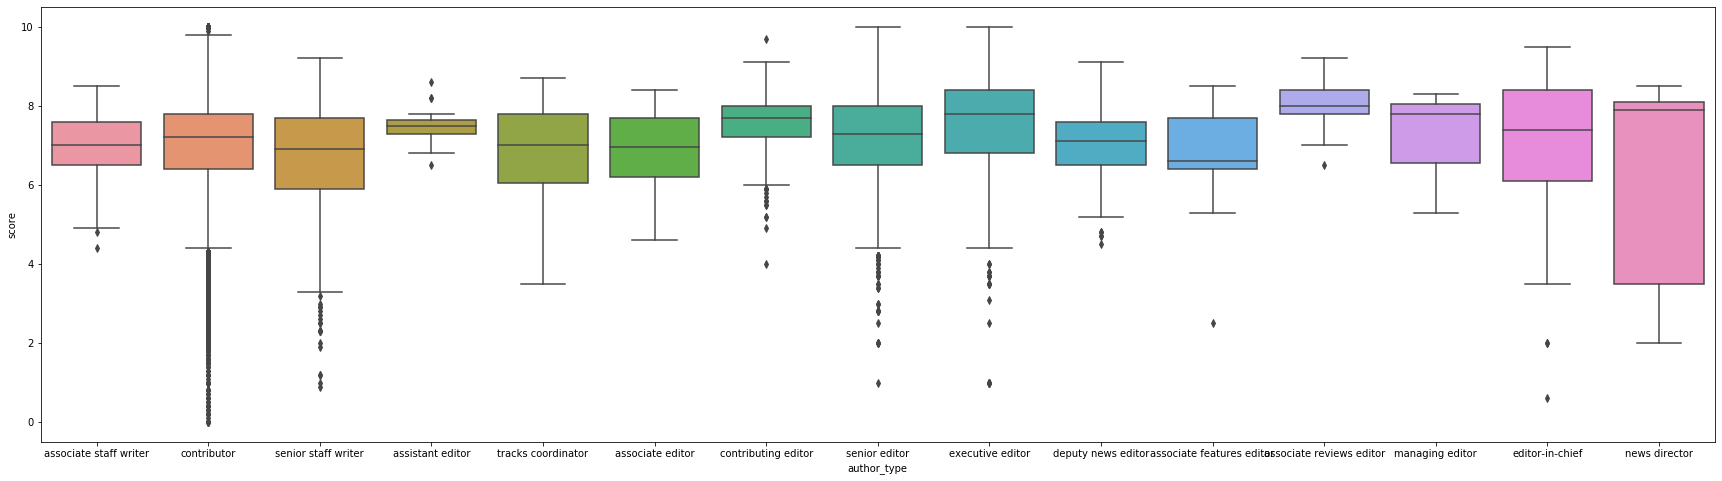

In [159]:
plt.figure(figsize=(30,8))
sns.boxplot(x='author_type',data=df,y='score')

In [162]:
df.isnull().sum()

reviewid             0
title                0
score                0
best_new_music       0
artist               0
author               0
author_type          0
pub_month            0
pub_year             0
genre             2589
label               44
dtype: int64

In [163]:
#df['author_type']=df['author_type'].fillna(df['author_type'].mode()[0])

In [164]:
df.isnull().sum()

reviewid             0
title                0
score                0
best_new_music       0
artist               0
author               0
author_type          0
pub_month            0
pub_year             0
genre             2589
label               44
dtype: int64

## Date
### pub_month,pub_year

In [165]:
df['pub_year'].value_counts()

2011    1793
2006    1782
2010    1748
2007    1733
2008    1691
2016    1674
2005    1644
2012    1631
2009    1623
2004    1612
2013    1599
2014    1558
2003    1528
2015    1358
2002    1295
2001     635
2000     523
1999     354
Name: pub_year, dtype: int64

In [166]:
df[df['best_new_music']==1].groupby(by='pub_year').mean()['score']

pub_year
2003    8.680769
2004    8.691803
2005    8.698305
2006    8.668750
2007    8.658571
2008    8.596667
2009    8.698425
2010    8.741860
2011    8.682707
2012    8.724590
2013    8.644444
2014    8.720000
2015    8.666990
2016    8.510000
Name: score, dtype: float64

In [168]:
df.groupby(by=['pub_year']).mean().T

pub_year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
reviewid,4844.796610,4250.602294,4693.337008,4491.762934,4650.949607,4846.872208,4870.557178,7694.658249,10358.065205,11714.293318,13134.279729,14344.933638,15512.928611,16734.472103,18141.098186,19450.389602,20679.374080,22024.989845
score,6.768362,6.870937,7.098740,6.857606,6.945877,7.181390,7.073844,6.989562,6.863935,6.903844,6.770856,6.940904,6.990351,6.969405,7.007004,7.091014,7.108468,7.242593
best_new_music,0.000000,0.000000,0.000000,0.000000,0.051047,0.037841,0.035888,0.026936,0.040392,0.035482,0.078250,0.073799,0.074177,0.074801,0.078799,0.077022,0.075847,0.077658
pub_month,6.429379,6.426386,8.092913,6.196911,6.225785,6.375310,6.405109,6.366442,6.226774,6.015967,6.155884,6.189931,6.002789,6.005518,6.180738,6.319641,6.329897,6.393070


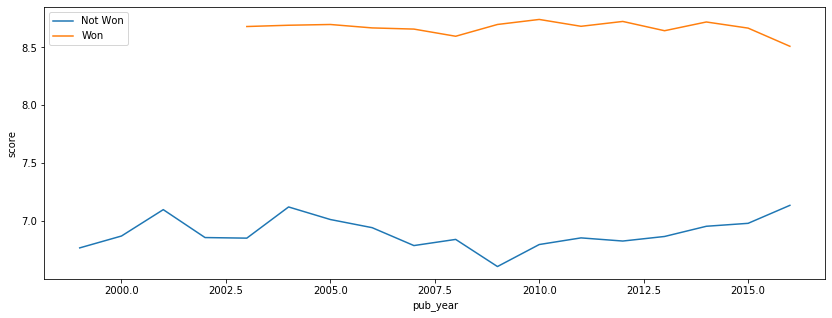

In [169]:
plt.figure(figsize=(14,5))
sns.lineplot(y=df[df['best_new_music']==0].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==0].groupby(by='pub_year').mean().index)
sns.lineplot(y=df[df['best_new_music']==1].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==1].groupby(by='pub_year').mean().index)
plt.legend(labels=['Not Won','Won'])
plt.show()

## Inference
    1.Best New Music awards started from 2003
    2. Removing values from 2017 since it seems that data has been taken from early 2017

In [170]:
df=df[df['pub_year']!=2017]

### pub_month

In [171]:
df['pub_month'].value_counts()

10    2487
4     2405
3     2396
6     2315
5     2267
9     2241
2     2141
11    2130
1     2091
7     2089
8     2075
12    1144
Name: pub_month, dtype: int64

## Genre

In [144]:
df['genre'].value_counts(dropna=False)

rock            10577
electronic       4356
NaN              2589
experimental     2114
rap              1939
pop/r&b          1669
metal             954
folk/country      772
jazz              536
global            276
Name: genre, dtype: int64

## Labels

In [42]:
df['label'].isnull().sum()

40

In [43]:
df['label'].fillna('None',inplace=True)

## Base Model

In [44]:
## Shape before Dropping
df.shape

(24888, 11)

In [45]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['artist', 'author', 'author_type', 'genre', 'label']

In [46]:
cols=['author_type','genre']
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [47]:
df['label'].isnull().sum()

0

In [48]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['artist']=le.fit_transform(df['artist'])
df['author']=le.fit_transform(df['author'])
df['label']=le.fit_transform(df['label'])
#df['pub_year']=le.fit_transform(df['pub_year'])

In [49]:
df=df.drop(['pub_day'],axis=1)

In [50]:
#df=df.dropna()

### MICE imputer

In [51]:
'''from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)'''

In [52]:
'''df=pd.DataFrame(imp.fit_transform(df))'''

In [53]:
## Shape after dropping
#df.shape

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1282.0,8.1,0.0,389.0,4.0,12.0,2016.0,2828.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1282.0,8.1,0.0,389.0,4.0,12.0,2016.0,2828.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3515.0,7.2,0.0,44.0,4.0,12.0,2016.0,1834.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7815.0,7.0,0.0,346.0,3.0,12.0,2016.0,2602.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7815.0,7.0,0.0,346.0,3.0,12.0,2016.0,2602.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
df.iloc[:,[1]]

,1
0,8.1
1,8.1
2,7.2
3,7.0
4,7.0
...,...
24883,6.3
24884,7.2
24885,7.2
24886,7.2


## Generating X and Y

In [58]:
y=df.iloc[:,[1]]
X=df.drop([1],axis=1)

In [59]:
import statsmodels.api as sm
xc=sm.add_constant(X)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     107.1
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:01:52   Log-Likelihood:                -40687.
No. Observations:               24888   AIC:                         8.143e+04
Df Residuals:                   24858   BIC:                         8.168e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0978      3.969      2.040      0.041       0.318      15.878
0           4.175e-06   3.08e-06      1.357      0.175   -1.86e-06    1.02e-05
2              1.7548      0.035     49.540      0.000       1.685       1.824
3             -0.0001   6.71e-05     -1.520      0.129      -0.000    2.95e-05
4              0.0065      0.005      1.354      0.176      -0.003       0.016
5              0.0086      0.002      3.615      0.000       0.004       0.013
6             -0.0007      0.002     -0.356      0.722      -0.005       0.003
7           1.653e-05   7.42e-06      2.228      0.026    1.99e-06    3.11e-05
8             -0.0021      0.170     -0.012      0.990      -0.336       0.332
9             -0.2874      0.303     -0.949      0.342      -0.881       0.306
10             0.6655      0.171      3.892      0.000       0.330       1.001
11             0.1552      0.118      1.315      0.188      -0.076       0.386
12             0.6074      0.085      7.124      0.000       0.440       0.775
13             0.1117      0.021      5.249      0.000       0.070       0.153
14             0.1330      0.112      1.188      0.235      -0.086       0.353
15             0.1657      0.110      1.506      0.132      -0.050       0.381
16             0.3506      0.052      6.701      0.000       0.248       0.453
17            -0.2066      0.718     -0.288      0.773      -1.613       1.200
18            -1.1830      0.556     -2.128      0.033      -2.273      -0.093
19            -0.0058      0.053     -0.110      0.912      -0.109       0.098
20            -0.3040      0.053     -5.737      0.000      -0.408      -0.200
21            -0.1162      0.171     -0.678      0.498      -0.452       0.220
22             0.3197      0.032      9.960      0.000       0.257       0.383
23             0.2783      0.048      5.747      0.000       0.183       0.373
24             0.4243      0.081      5.250      0.000       0.266       0.583
25             0.3386      0.059      5.720      0.000       0.223       0.455
26             0.0479      0.044      1.089      0.276      -0.038       0.134
27            -0.0745      0.035     -2.156      0.031      -0.142      -0.007
28            -0.0660      0.033     -1.972      0.049      -0.132      -0.000
29            -0.0147      0.020     -0.750      0.453      -0.053       0.024
==============================================================================
Omnibus:                     6227.403   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17096.818
Skew:                          -1.333   Prob(JB):                         0.00
Kurtosis:                       6.063   Cond. No.                     2.90e+06
==============================================================================

W

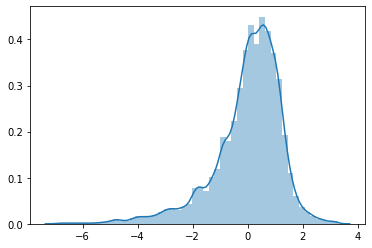

In [60]:
residuals=model.resid
sns.distplot(residuals)

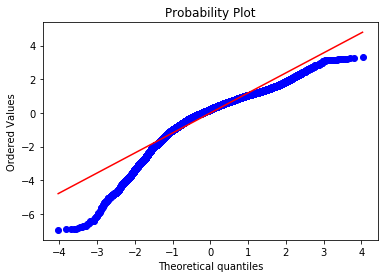

In [61]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [62]:
# Backward Elimination
cols=list(X.columns)
pmax=1
while len(cols)>0:
    p=[]
    C=X[cols]
    xc=sm.add_constant(C)
    model=sm.OLS(y,xc).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if pmax>0.05:
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_cols=cols
print(selected_cols)

[2, 5, 7, 10, 12, 13, 16, 18, 20, 22, 23, 24, 25, 27, 28]


In [63]:
X_final=df[cols]
y=df['score']

KeyError: 'score'

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error as mse
Xtrain,Xtest,ytrain,ytest=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [65]:
LR=LinearRegression()
LR.fit(Xtrain,ytrain)
y_pred_train=LR.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

R2 score of Train: 0.11180159624474884
RMSE of Train: 1.2388276881392228


In [66]:
y_pred_test=LR.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

R2 score of Test: 0.1066891225962805
RMSE of Test: 1.2475993236786682


## K-Fold

In [67]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR],['MVLR']):
    rmse=[]

    for train, test in kf.split(X_final,y):
        X_train,X_test=X_final.iloc[train,:],X_final.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        rmse.append(np.sqrt(mse(y_test,y_pred)))
print(rmse)

[1.2430362301905975, 1.2244098150377791, 1.2214483033561592, 1.2680472834452048, 1.2528582662178331]


In [68]:
np.mean(rmse),np.var(rmse,ddof=1)


(1.2419599796495149, 0.0003823038817358541)